# Kohonen self organizing map (SOM)

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Image

## Utilities used for manipulation of data/matrices in the task

In [25]:
def generateInputWith24Shades():
    colorInputs = []
    colorInputs.append([236, 28, 28])
    colorInputs.append([153, 255, 51])
    colorInputs.append([51, 153, 255])
    colorInputs.append([255, 255, 153])
    colorInputs.append([0, 204, 204])
    colorInputs.append([255, 102, 255])
    colorInputs.append([198, 18, 18])
    colorInputs.append([31, 154, 199])
    colorInputs.append([255, 244, 71])
    colorInputs.append([255, 0, 127])
    colorInputs.append([93, 209, 124])
    colorInputs.append([0, 76, 153])
    colorInputs.append([255, 153, 153])
    colorInputs.append([255, 204, 255])
    colorInputs.append([153, 0, 0])
    colorInputs.append([229, 255, 204])
    colorInputs.append([76, 153, 0])
    colorInputs.append([76, 0, 153])
    colorInputs.append([255, 0, 0])
    colorInputs.append([0, 255, 0])
    colorInputs.append([0, 0, 255])
    colorInputs.append([153, 0, 76])
    colorInputs.append([153, 76, 0])
    colorInputs.append([255, 255, 0])
    showInputColors(colorInputs)
    return np.array(colorInputs)/255

In [26]:
# Utility to generate input colors taken for training the network
def showInputColors(colors):
    grid = []
    for color in colors: 
        rowGrid = []
        for x in range(len(colors)):
            rowGrid.append(color)
        grid.append(rowGrid)
    print('Colors selected as inputs....')
    plt.figure(figsize=(5,5))
    plt.imshow(grid)
    plt.show()

In [27]:
# Given RGB 3D matrix, This utility shows the pattern of colors
def showGridColor(rgbInput):
    print('Color Pattern....')
    plt.figure(figsize=(5,5))
    plt.imshow(rgbInput.astype(np.uint8))
    plt.show()

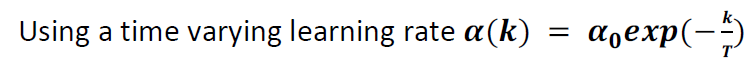

In [28]:
Image(filename='img/q4_1.png')

In [29]:
# Returns learning rate of an epoch
# Return value is based on above equation
def getLearningRate(initialAlpha, currentIteration, totalIteration):
    return initialAlpha*np.exp(-currentIteration/totalIteration)

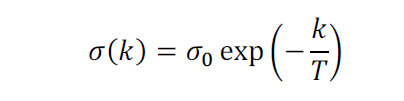

In [30]:
Image(filename='img/q4_2.png')

In [31]:
# Returns Sigma/Distance factor of an epoch
# Return value is calculated analogous to above equation
def getDistanceFactor(initialDistance, currentIteration, totalIteration):
    return initialDistance*np.exp(-currentIteration/totalIteration)

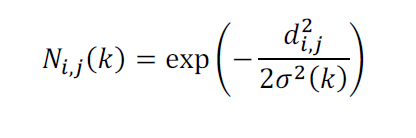

In [32]:
Image(filename='img/q4_3.png')

In [33]:
# Returns neighborhood factor of a node, given winner node
def getNeighbourFactor(winnerNode, distanceFactor):
    indexGrid = getIndexGrid()
    distance = (np.sum((indexGrid-winnerNode)**2,axis=2))/(-2*(distanceFactor ** 2))
    return np.exp(distance)

In [34]:
# Returns a 100X100X3 3D matrix pointing out index of row and column of each element of the 2D view matrix 
# Return value is used to calculate distance of every node on the grid from the winner node
def getIndexGrid():
    grid = []
    for i in range(100):
        row = []
        for j in range(100):
            row.append([i,j])
        grid.append(row)
    return np.array(grid)

In [35]:
# Returns euclidean distance between the weights of the target neurons/nodes and input weight 
def calculateDistance(inputMatrix, targetMatrix): 
    distance = np.sum((targetMatrix-inputMatrix) ** 2,axis = 2)
    return distance

In [36]:
# Returns indexes of winner node/neuron
def getWinnerNodeIndex(inputMatrix, targetMatrix):
    distances = calculateDistance(inputMatrix, targetMatrix)
    winner = np.where(distances == np.min(distances))
    return np.array([winner[0][0], winner[1][0]])

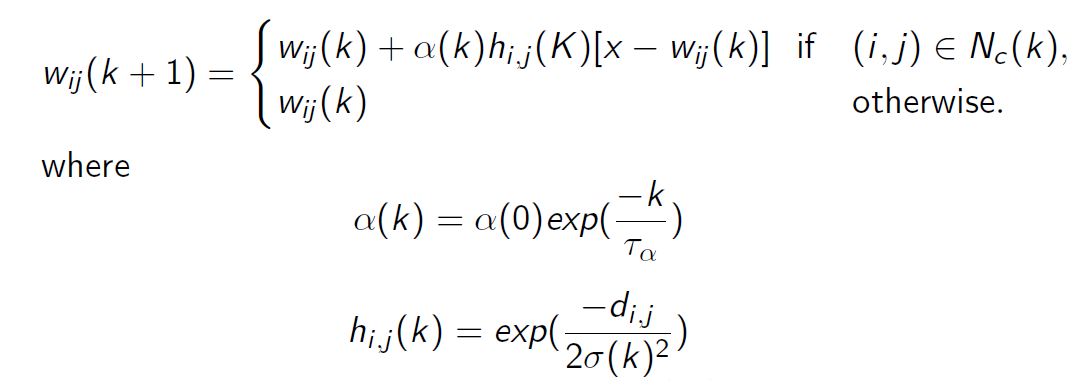

In [37]:
Image(filename='img/q4_5.png')

In [38]:
# Returns Delta W for an instance of an epoch, given epoch parameters, weights and input signal
# Return value is calculated analogous to above equation
def getDeltaW(initialAlpha, initialDistance, 
              currentIteration, totalIteration, 
              winnerNode, weights, inputMatrix):
    learningRate = getLearningRate(initialAlpha=initialAlpha, 
                                   currentIteration=currentIteration, 
                                   totalIteration=totalIteration)
    distanceFactor = getDistanceFactor(initialDistance=initialDistance, 
                                       currentIteration=currentIteration, 
                                       totalIteration=totalIteration)
    neighborFactor = getNeighbourFactor(winnerNode, distanceFactor)
    deltaW = learningRate*((-1*(weights - inputMatrix)).transpose()*
                           neighborFactor.transpose()).transpose()
    return deltaW

## Considering 24 sample input colors

Colors selected as inputs....


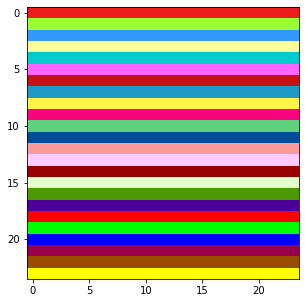

In [39]:
inputColors = generateInputWith24Shades()

## Initializing weights for 100x100 nodes 

In [45]:
W =  np.random.rand(100, 100, 3)
initialRate = 0.8 # Initial alpha value

## Training of network

In [41]:
def trainNetwork(iterations, initialSigma, weights):
    print('Training.... Please wait... this may take some time....')
    for i in range(iterations):
        for color in inputColors:
            winner = getWinnerNodeIndex(color, weights)
            deltaW = getDeltaW(initialAlpha=initialRate, 
                               initialDistance=initialSigma,
                               currentIteration=i, 
                               totalIteration=iterations, 
                               winnerNode=winner, 
                               weights=weights, 
                               inputMatrix=color)
            weights = weights + deltaW
    print('Training ends....')
    print('Pattern generated after training')
    showGridColor(np.around(weights*255))

## Initial pattern of 100x100 output neurons/nodes

Color Pattern....


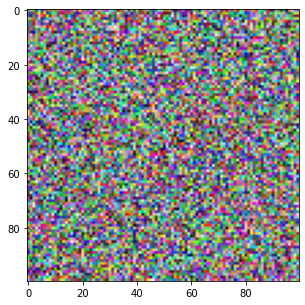

In [43]:
showGridColor(np.around(W*255))

# Case studies taking above conditions of epochs and distance values

## Case study [CS 1]
#### note: initialSigma, iterations are the variables for training the network 

### No of epochs = 20 

#### [CS-1a] epochs=20 sigma=1 

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


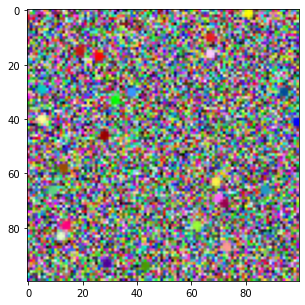

In [46]:
wtrain = W
trainNetwork(iterations=20, initialSigma=1, weights=wtrain)

#### [CS-1b] epochs=20 sigma=10

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


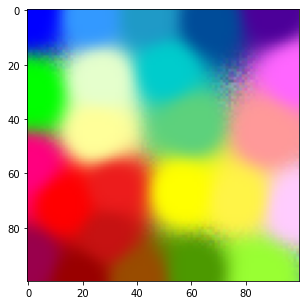

In [22]:
wtrain = W
trainNetwork(iterations=20, initialSigma=10, weights=wtrain)

#### [CS-1c] epochs=20 sigma=30

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


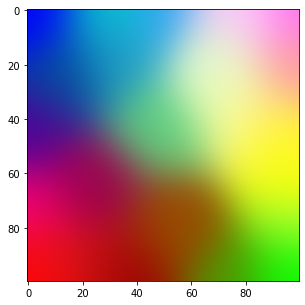

In [23]:
wtrain = W
trainNetwork(iterations=20, initialSigma=30, weights=wtrain)

#### [CS-1d] epochs=20 sigma=50

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


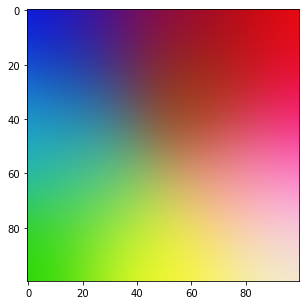

In [176]:
wtrain = W
trainNetwork(iterations=20, initialSigma=50, weights=wtrain)

#### [CS-1e] epochs=20 sigma=70

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


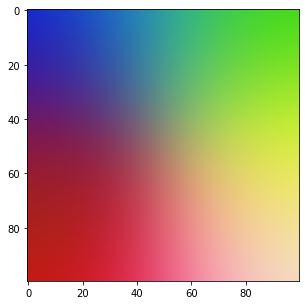

In [177]:
wtrain = W
trainNetwork(iterations=20, initialSigma=70, weights=wtrain)

## Case study [CS 2]

### No of epochs = 40

#### [CS-2a] epochs=40 sigma=1 

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


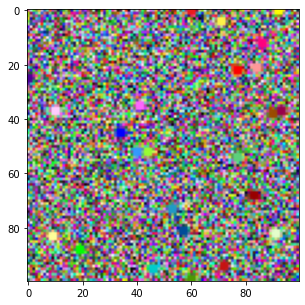

In [178]:
wtrain = W
trainNetwork(iterations=40, initialSigma=1, weights=wtrain)

#### [CS-2b] epochs=40 sigma=10 

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


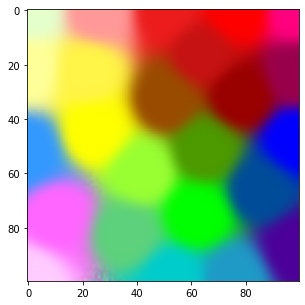

In [179]:
wtrain = W
trainNetwork(iterations=40, initialSigma=10, weights=wtrain)

#### [CS-2c] epochs=40 sigma=30

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


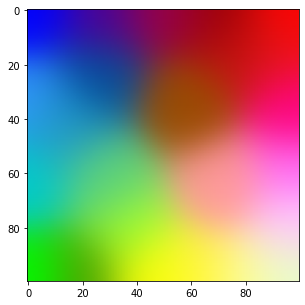

In [180]:
wtrain = W
trainNetwork(iterations=40, initialSigma=30, weights=wtrain)

#### [CS-2d] epochs=40 sigma=50

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


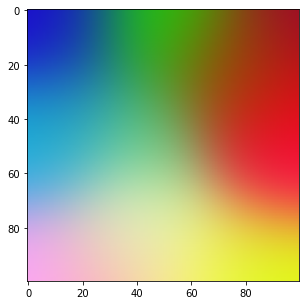

In [181]:
wtrain = W
trainNetwork(iterations=40, initialSigma=50, weights=wtrain)

#### [CS-2e] epochs=40 sigma=70

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


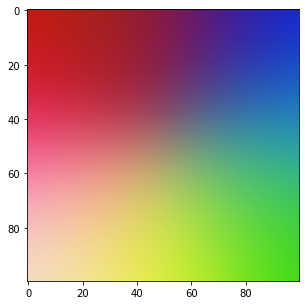

In [182]:
wtrain = W
trainNetwork(iterations=40, initialSigma=70, weights=wtrain)

## Case study [CS 3]

### No of epochs = 100

#### [CS-3a] epochs=100 sigma=1

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


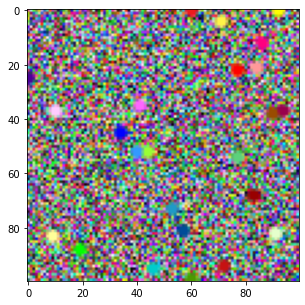

In [183]:
wtrain = W
trainNetwork(iterations=100, initialSigma=1, weights=wtrain)

#### [CS-3b] epochs=100 sigma=10

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


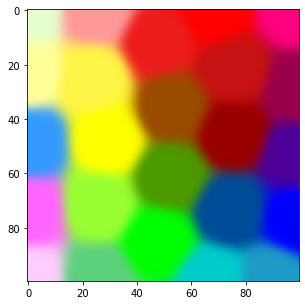

In [184]:
wtrain = W
trainNetwork(iterations=100, initialSigma=10, weights=wtrain)

#### [CS-3c] epochs=100 sigma=30

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


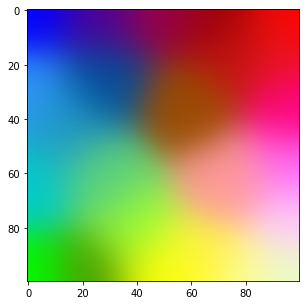

In [185]:
wtrain = W
trainNetwork(iterations=100, initialSigma=30, weights=wtrain)

#### [CS-3d] epochs=100 sigma=50

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


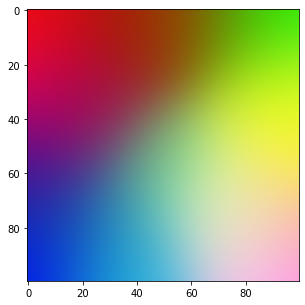

In [186]:
wtrain = W
trainNetwork(iterations=100, initialSigma=50, weights=wtrain)

#### [CS-3e] epochs=100 sigma=70

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


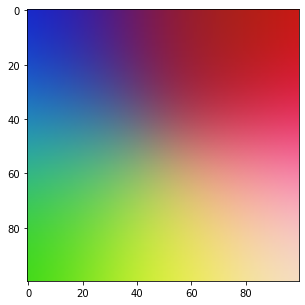

In [187]:
wtrain = W
trainNetwork(iterations=100, initialSigma=70, weights=wtrain)

## Case study [CS 4]

### No of epochs = 1000 

#### [CS-4a] epochs=1000 sigma=1

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


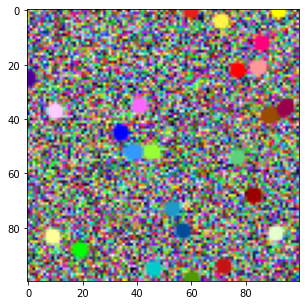

In [188]:
wtrain = W
trainNetwork(iterations=1000, initialSigma=1, weights=wtrain)

#### [CS-4b] epochs=1000 sigma=10

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


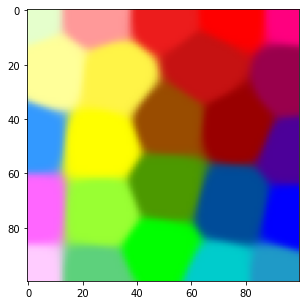

In [189]:
wtrain = W
trainNetwork(iterations=1000, initialSigma=10, weights=wtrain)

#### [CS-4c] epochs=1000 sigma=30

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


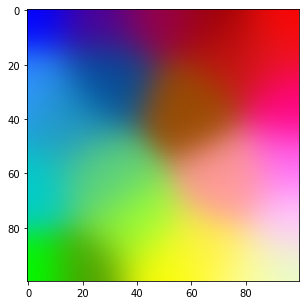

In [190]:
wtrain = W
trainNetwork(iterations=1000, initialSigma=30, weights=wtrain)

#### [CS-4d] epochs=1000 sigma=50

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


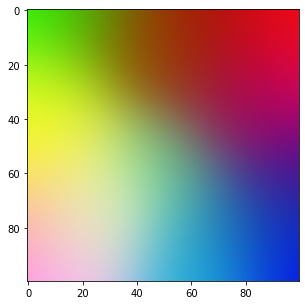

In [191]:
wtrain = W
trainNetwork(iterations=1000, initialSigma=50, weights=wtrain)

#### [CS-4e] epochs=1000 sigma=70

Training.... Please wait... this may take some time....
Training ends....
Pattern generated after training
Color Pattern....


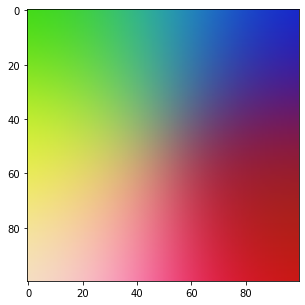

In [192]:
wtrain = W
trainNetwork(iterations=1000, initialSigma=70, weights=wtrain)

# Takeaway

## 1. With a small distance (sigma) parameter, 
##    the network makes the classification within a smaller radius around the winner nodes.
##    As the weigths are updated around winner node within a small radius,
##    Hence, forming distinct bounadries of classification 


## 2. With a larger distance parameter,
##    the network makes the classification for a bigger radius around the winner nodes, 
##    Hence the colors/classification show cascading effect in the network

## 3. As we increase the epochs, The classification of network becomes more clear and explicit,
##    as weights are updated more number of times around the winner nodes